1. Stochastic Gradient Descent para encontrar el máximo de una función

    * Implementar en Python un algoritmo basado en Stochastic Gradient Descent para encontrar numéricamente el mínimo de ![equation](https://latex.codecogs.com/svg.image?%7B%5Ccolor%7BYellow%7D%20y%20=%20-(x-2)%5E2%20&plus;%203%7D) ¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de x? ¿En qué momento detuviste la búsqueda y por qué? ¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia? ¿Cuáles son los hiper parámetros del algoritmo?

In [2]:
# Importamos las librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

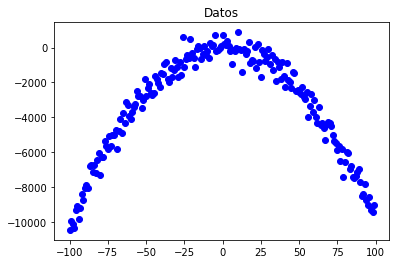

In [3]:
#Se define el dataset 
def f(x):  
    np.random.seed(42) 
    a2=-1
    a1=2
    a0=-1
    y = a2*x**2 + a1*x + a0*500*np.random.randn(x.shape[0])
    return y
    
X = np.array(np.arange(-100, 100, 1) )
Y = f(X) 
plt.scatter(X,Y,label='data', color='blue')
plt.title('Datos');




In [29]:
#Calculamos los tres gradientes, correspondientes a los tres coeficientes
def gradientes(x, y, b):
    res = b[0] + b[1] * x +b[2]*(x**2)- y
    return res.mean(), (res * x).mean(), (res * (x**2)).mean() 


In [30]:
def sgd(gradient, x, y, n_vars=None, start=None, learn_rate=0.01,decay_rate=0.0, batch_size=1, n_iter=50, tolerance=1e-06,
    dtype="float64", random_state=None ):

    # Se lleva todo a numpy
    dtype_ = np.dtype(dtype)
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Inicializando, en caso stocastico de forma aleatoria
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)
    vector = (rng.normal(size=int(n_vars)).astype(dtype_)
               if start is None else np.array(start, dtype=dtype_))
 
    # SGD

    for _ in range(n_iter):
        # random shuffle 
        rng.shuffle(xy)
        # Minibatch, si batch_size es distinto de 1 y de len(y)
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]
            # Calculamos el paso
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad
            print(grad)
        
   
            # Actualizamos las tres variables
            vector += diff


    return vector if vector.shape else vector.item()

In [31]:
b0,b1,b2=sgd(gradientes, X, Y, n_vars=3, learn_rate=0.001,decay_rate=0.8, batch_size=1, n_iter=10, random_state=10)

print(b0,b1,b2)

[  -1013.85812216   27374.16929831 -739102.5710544 ]
[-5.85860566e+06  5.21415904e+08 -4.64060154e+10]
[-2.54161981e+11  1.88079866e+13 -1.39179101e+15]
[-1.17822425e+16  1.08396631e+18 -9.97249008e+19]
[-6.86924471e+20 -5.70147311e+22 -4.73222268e+24]
[-1.09060082e+25 -5.23488392e+26 -2.51274428e+28]
[-6.53954992e+28 -3.33517046e+30 -1.70093694e+32]
[-8.24109623e+31 -1.81304117e+33 -3.98869058e+34]
[-1.58871981e+35  1.00089348e+37 -6.30562894e+38]
[-1.00936517e+39  4.03746066e+40 -1.61498426e+42]
[-4.53612279e+42 -2.40414508e+44 -1.27419689e+46]
[-8.57075775e+46 -7.02802136e+48 -5.76297751e+50]
[-4.87853872e+51 -4.48825562e+53 -4.12919517e+55]
[-2.08187506e+56 -1.47813129e+58 -1.04947322e+60]
[-4.22782975e+57 -8.45565950e+57 -1.69113190e+58]
[-3.82563413e+58  2.29538048e+59 -1.37722829e+60]
[-1.09834282e+61  7.35889686e+62 -4.93046090e+64]
[-7.09139345e+63 -8.50967214e+64 -1.02116066e+66]
[-5.30505446e+64 -3.71353812e+65 -2.59947668e+66]
[-1.76697427e+65  1.23688199e+66 -8.65817393e+6

C:\Users\54922\AppData\Local\Temp/ipykernel_11044/996929399.py:3: RuntimeWarning: overflow encountered in multiply
  res = -1*(b[0] + b[1] * x +b[2]*(x**2)- y)
C:\Users\54922\AppData\Local\Temp/ipykernel_11044/996929399.py:3: RuntimeWarning: invalid value encountered in add
  res = -1*(b[0] + b[1] * x +b[2]*(x**2)- y)


[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan n

In [26]:
y_pred=b2*(X**2) + b1*X +b0
y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na